# Welcome to lab_kmeans! 🌎

In this lab, you will continue your exploration of machine learning by doing some k-means clustering! 

A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Xiaocong"
ca1_name = "Shannon"
ca2_name = "Aishwarya"


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "When are you leaving campus for winter break?"
partner1_name = "John"
partner1_netid = "jvasi2"
partner1_day = "December 10th"

partner2_name = "Eric"
partner2_netid = "ericrz2"
partner2_day = "December 16th"

partner3_name = ""
partner3_netid = ""
partner3_day = ""

<hr style="color: #DD3403;">

# Part 1: The World Happiness Dataset
Every year, the UN Sustainable Development Solutions Network (SDSN) creates a **report** detailing the "happiness" of various countries in the world. Utilizing economic, social, and health data, they create the [World Happiness Report](https://worldhappiness.report/about/). Curators of the report **observed survey data** of seven variables (GDP Per Capita, Social Support, Life Expectancy, Freedom, Generosity, Corruption, and Dystopia), estimating their **associations with life** evaluations, ultimately coming up with a `Happiness Score` for each country.  

Some of their report uses data that we can analyze for this lab. We've collected a version of the 2023 **World Happiness** into a dataset and provided it in **CSV format** - it's the `happiness-report-2023.csv` file! 

## Puzzle 1.1: Loading In

Load the **World Happiness Dataset** from `happiness-report-2023.csv` and store it in the DataFrame `df`:

In [55]:
import pandas as pd
df = pd.read_csv("happiness-report-2023.csv")
df

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2.110
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,-0.110


### 🔬 Test Case Checkpoint 🔬

In [2]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert('df' in vars()), "The DataFrame should be loaded in as a variable named `df`."
assert(len(df) == 137), "This is not the dataset we are looking for..."
assert('Happiness Score' in df), "This is not the dataset we are looking for..."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Correlation Coefficients
Let's explore a bit about our dataset. It's always good practice to explore and understand your data before performing any machine learning task. Generate the **correlation coefficient matrix** of our **World Happiness Dataset**, `df` in the cell below:

Note: Some versions of Pandas will not run the `.corr()` function on DataFrames with non-numerical columns. There is a `numeric_only` argument in `.corr()` that you can set to `True` to only include numerical columns in correlation coefficient matrix. It should look like `.corr(numeric_only = True)`.

In [3]:
df.corr(numeric_only = True)

,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
Happiness Score,1.000000,0.784367,0.834532,0.746928,0.662924,0.044082,-0.471911,0.494452
GDP Per Capita,0.784367,1.000000,0.738069,0.837533,0.451439,-0.156456,-0.436961,-0.044568
Social Support,0.834532,0.738069,1.000000,0.725524,0.541630,0.036574,-0.272490,0.148731
Healthy Life Expectancy,0.746928,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,-0.014420
Freedom,0.662924,0.451439,0.541630,0.415092,1.000000,0.170229,-0.383786,0.211993
Generosity,0.044082,-0.156456,0.036574,-0.135036,0.170229,1.000000,-0.122653,0.016380
Corruption,-0.471911,-0.436961,-0.272490,-0.404396,-0.383786,-0.122653,1.000000,-0.004467
Dystopia,0.494452,-0.044568,0.148731,-0.014420,0.211993,0.016380,-0.004467,1.000000


### Group Analysis: Correlations


**Q1: Which two columns were the most highly correlated, producing a coefficient of `0.837533`? Given the real-life context, does this make sense? Why or why not?**

Health Life Expectancy and GDP Per Capita. I think that this would make sense as the more resources a country has (presumably health and medical supplies), the more that they can provide to its citizens, leading to longer lifespans. 

**Q2: All of the columns in our dataset show significant correlation with `Happiness Score` except for `Generosity` (with a coefficient of `0.044082`).This means there is almost no relationship between the perceived `Generosity` of a country and its `Happiness Score`. Explain why you think this is the case.**

Perception is totally different from the actual "happiness" of an average citizen. This correlation coefficient makes sense.

## Puzzle 1.3: Visualization
Now, let's visualize the relationships between some variables in our dataset. 

Generate a scatter plot showing the relationship between `GDP Per Capita` and `Healthy Life Expectancy`. Remember to specify these columns as the **x** and **y** of the scatter plot.


<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

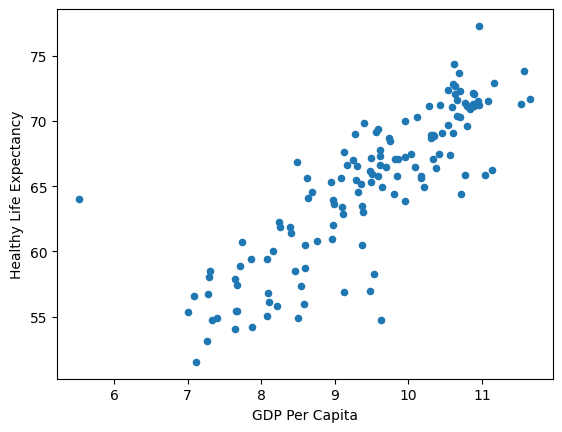

In [5]:
df.plot.scatter(x= 'GDP Per Capita', y= 'Healthy Life Expectancy')

**Q3: Observing the plot above, how would you divide the data into two groups (clusters)?**

I would divide beween countries with the lowest Health expectancies and highest health expectancies. 

Now, generate a scatter plot showing the relationship between `Happiness Score` and `Generosity`:

<Axes: xlabel='Generosity', ylabel='Happiness Score'>

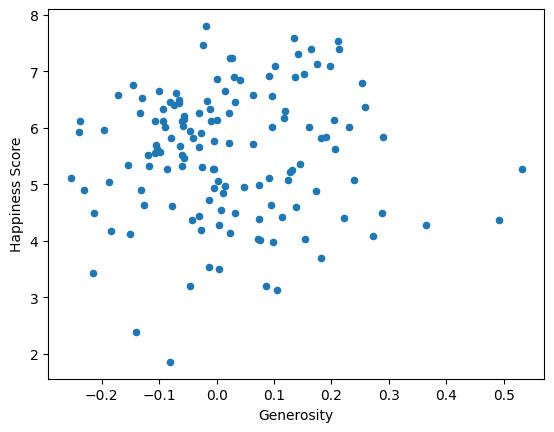

In [6]:
df.plot.scatter(x= 'Generosity', y= 'Happiness Score')

**Q4: Observing the plot above, how would you divide the data into two groups (clusters)?**

It'd be kind of hard to do since these two variables have very little correlation but maybe you could divide it by least happiest from happiest.

<hr style="color: #DD3403;">

# Part 2: Clustering
Now that we've observed some relationships in our dataset, it's time to try **clustering the data**! You may have noticed that our dataset contains fairly high **correlation coefficients** across **multiple columns**. Despite this, it will still be **valuable** to perform **k-means clustering**. 

With a **k-means clustering** model, we will be able to both:
- Identify potential relationships between **non-linear** variables, and
- Identify the **most important *features*** of our dataset by looking at **cluster centroids**

Before we begin, remember that KMeans clustering is a method of **unsupervised** machine learning, meaning unlike `lab_regression`, we **do not provide** **labels** or target values. Rather, we will **allow the model** to determine **groups of the data** based on their similarity alone. 

## Part 2.1: Creating a KMeans Model

In the cell below, create a new k-means model named `kmeans` that contains just **two (2) clusters**:


In [16]:
# Import the KMeans library:
from sklearn.cluster import KMeans

# Create a KMeans model:
kmeans = KMeans(n_clusters = 2)

## Part 2.2: Fitting Numeric Columns to the Model
The k-means model only works on **numeric data** (*you can't find a mean -- or average -- of non-numbers*). The following code provides a list of all the **numeric columns** in our `df`. We've provided you with the cell below to define and store the `numeric_columns` list.

*Do not modify the cell below - just **run it!***

In [17]:
numeric_columns = ['Happiness Score', 'GDP Per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption','Dystopia']
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

Try to `fit` the k-means model data from the `numeric_columns`.

Note: You should **expect to see** a `ValueError: Input X contains NaN.!` Make sure to get that **error message** - this is **intended**!

In [18]:
kmeans.fit(df[numeric_columns])

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Puzzle 2.3: Drop the Rows with Missing Data

The **error message** above provides details on several solutions to dealing with **missing data**. To continue to use `KMeans`, our best option is to **drop rows with missing data**. Create a new DataFrame, `df2`, that contains only **rows in `df` with no NaN values** that can be used for clustering:

Hint: The `.dropna()` function would be useful here!



In [19]:
df2 = df.dropna()
df2

,Country,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,2.110
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,-0.110


### 🔬 Test Case Checkpoint 🔬

In [20]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(not(df2[numeric_columns].isna().any().any())), "Make sure to drop all rows in `df2` with NaN values."
assert(len(df) - len(df2) == 1), "The length of your `df2` if not correct. Make sure you dropped all NaN rows in `df2`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Part 2.4: Normalizing the Numeric Data

In lecture, you learned that means are **VERY sensitive** to **outliers**. Since our data comes from **different ranges**, we must **normalize the numeric data**. To **normalize the data**, we can divide **each numeric column** by the **maximum value** of the column. This is done in the provided code below.

Notice that, in the result, all column values are now **scaled to be between 0 and 1**. Since all values are now in the **same range**, we no longer have any column with values in a different range.

*Do not modify the cell below - just **run it!***

In [21]:
for column in numeric_columns:
    df2[column] = df2[column] / df2[column].abs().max()
df2[numeric_columns]

C:\Users\lyons\AppData\Local\Temp\ipykernel_3576\3278795095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column] = df2[column] / df2[column].abs().max()


,Happiness Score,GDP Per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Corruption,Dystopia
0,1.000000,0.925557,0.985758,0.920678,1.000000,-0.035782,0.195910,0.799662
1,0.972066,0.940137,0.970498,0.921972,0.971904,0.252354,0.210980,0.705245
2,0.964890,0.934477,1.000000,0.932324,0.973985,0.397363,0.719053,0.761421
3,0.957586,0.912436,0.959308,0.940696,0.841831,-0.043315,0.762110,0.910660
4,0.948616,0.938422,0.946083,0.925854,0.922997,0.401130,0.407966,0.714044
...,...,...,...,...,...,...,...,...
132,0.410943,0.600943,0.663276,0.716550,0.690947,0.161959,0.897740,0.393232
133,0.410559,0.655317,0.701933,0.699405,0.680541,-0.086629,0.824543,0.306261
134,0.402101,0.634134,0.564598,0.710404,0.686785,0.197740,0.923574,0.413198
135,0.306509,0.812864,0.539166,0.855965,0.493236,-0.265537,0.959096,-0.037225


## Puzzle 2.5: Training with `numeric_columns` from `df2`

Now that we have handled missing data and normalized the numeric data, we can **train our model**! Using the `numeric_columns` and `df2`, `fit` your `kmeans` model:

In [23]:
kmeans.fit(df2[numeric_columns])

C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

### 🔬 Test Case Checkpoint 🔬

In [24]:
## == TEST CASES for Puzzle 2.5 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isinstance(kmeans, KMeans)), "The `kmeans` model should be saved as `kmeans`."
assert(kmeans.n_clusters == 2), "The `kmeans` model should have two clusters."
assert(kmeans.cluster_centers_ is not None), "The `kmeans` model should be trained with `df2`'s `numeric_columns`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.6: Centroids

In lecture, you learned that `kmeans.cluster_centers_` will display the location of the **final centroids**.

The **order they're displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

Explore the **centroids** and **numeric columns** by **running the cells below**:


In [25]:
kmeans.cluster_centers_

array([[ 0.67593266,  0.78897619,  0.78478216,  0.82684262,  0.79465834,
        -0.08268027,  0.8421473 ,  0.61182614],
       [ 0.78514   ,  0.85834297,  0.87227046,  0.87060252,  0.87500907,
         0.31918714,  0.64548026,  0.57960099]])

In [26]:
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

### Analysis: Centroids

**Q5: In the following cell, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happier"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)



Based off the centroids, the second cluster appears to have the "happier" countries. This is because each of the centroids in the second cluster are larger than the first batch of centroids in the first cluster. The features that are arguable most important to defining centroid would be how far each centroid is from another centroid and which once has the farthest euclidian distance. 

## Puzzle 2.7: Prediction

Now, we can use our model to **assign each country** in our dataset to one of the two **clusters**!

Using your `kmeans` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `cluster`:



In [35]:
df2['cluster'] = kmeans.predict(df2[numeric_columns])

C:\Users\lyons\AppData\Local\Temp\ipykernel_3576\1525503587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = kmeans.predict(df2[numeric_columns])


### 🔬 Test Case Checkpoint 🔬

In [36]:
## == TEST CASES for Puzzle 2.7 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import pandas.api.types as ptypes
assert('cluster' in df2.columns.to_list()), "The cluster predictions should be stored in a column `cluster` of `df2`."
assert(ptypes.is_numeric_dtype(df2['cluster'])), "The `cluster` column should be numeric."
assert(set(df2.cluster.unique()) == set([0, 1])), "The `cluster` column should contain values of 0 and 1 (representing the cluster of each row)."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.8: Visualizing Your Model

In the cell below, we've used `df2.plot.scatter()` to display a **scatter plot** of some columns of our data. We specify the **parameter** `c` (color) to be the `cluster` of each data point, visualizing the **two clusters** in **two different colors**. 

The columns in the scatter plot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

*Do not modify the cell below - just **run it!***

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

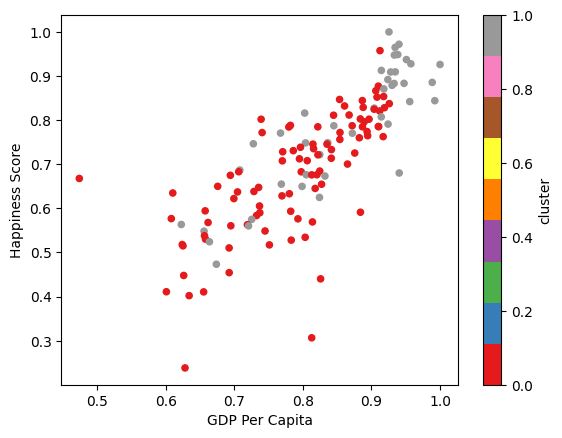

In [37]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="cluster",
    colormap='Set1'
)

**Q6: In the plot above, do we see clean clusters, or are points intermingled? What does this say about our clustering model in relation to the columns shown in the plot?**

There are points that are intermingled. What this says about our clustering model in relation to the columns shown in the plot is that our clustering model may not be the most accurate. It also doesn't imply direct correlation as it classifies points into groups.

Next, using the code from **above** as a template, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

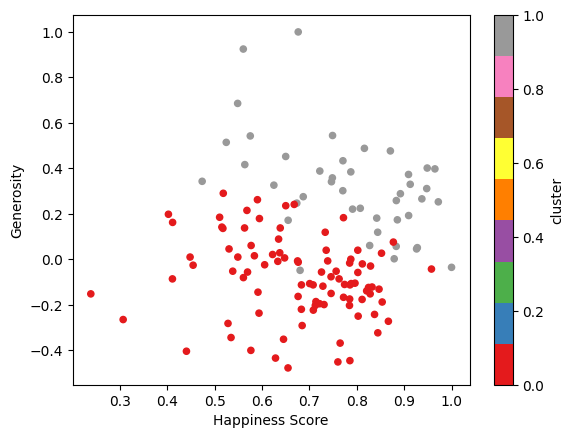

In [40]:
df2.plot.scatter(x= 'Happiness Score', y= 'Generosity',c= "cluster", colormap= 'Set1')

**Q7: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a low correlation between `Happiness Score` and `Generosity`. Does this make sense given the clusters above? Why or why not?**

This makes sense as the points don't model a very strong positive/negative correlation.

Finally, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

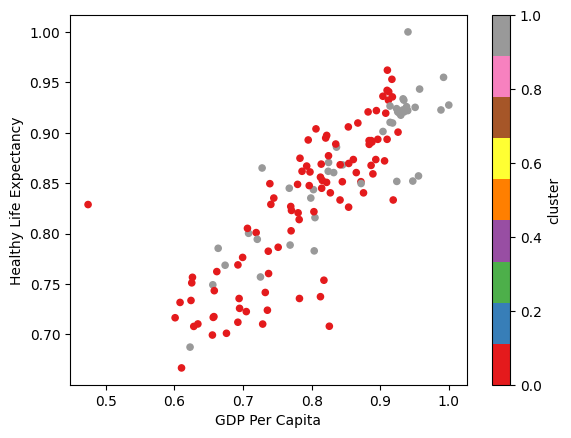

In [41]:
df2.plot.scatter(x= 'GDP Per Capita', y= 'Healthy Life Expectancy',c= "cluster", colormap= 'Set1')

**Q8: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a high correlation between `GDP Per Capita` and `Healthy Life Expectancy`. Does this make sense given the clusters above? Why or why not?**

Yes as the points here have a very strong and positive correlation 

<hr style="color: #DD3403;">

# Part 3: A Third Cluster
Our first `kmeans` model was created with only **two (2) clusters**. This is a valid start, but perhaps **more clusters** suit the dataset better. 

Let's experiment by adding **an additional cluster** and observe any differences in model results!

## Puzzle 3.1: Creating and Training our Model

In the cell below, create a new KMeans model named `kmeans_three` that contains **three (3) clusters**:


In [43]:
kmeans_three = KMeans(n_clusters = 3)

Recall that k-means models can only be fit to **numeric data**, and the data **cannot be NaN**. 

Using the `numeric_columns` and `df2`, `fit` your `kmeans_three` model:

In [44]:
kmeans_three.fit(df2[numeric_columns])

C:\Users\lyons\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### 🔬 Test Case Checkpoint 🔬

In [45]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(isinstance(kmeans_three, KMeans)), "The KMeans model with three clusters should be saved as `kmeans_three`."
assert(kmeans_three.n_clusters == 3), "The `kmeans_three` model should have three clusters."
assert(kmeans_three.cluster_centers_ is not None), "The `kmeans_three` model should be trained with `df2`'s `numeric_columns`."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Model Centroids

Explore the **centroids** of your `kmeans_three` model alongside the  **numeric columns** by **running the cells below**:

Remember, the **order of numbers displayed** will be the **same order** as the columns are listed in `numeric_columns`. 

In [46]:
kmeans_three.cluster_centers_

array([[ 0.8838256 ,  0.93321898,  0.92599186,  0.91524489,  0.92464447,
         0.20935342,  0.46210083,  0.60513254],
       [ 0.59618145,  0.70985249,  0.70309257,  0.7729485 ,  0.76836629,
         0.22485876,  0.85890205,  0.60574619],
       [ 0.73551405,  0.84505893,  0.8566764 ,  0.866435  ,  0.82127152,
        -0.16502643,  0.83935206,  0.59697069]])

In [47]:
numeric_columns

['Happiness Score',
 'GDP Per Capita',
 'Social Support',
 'Healthy Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia']

### Analysis: Centroids, Again
**Q9: Once more, answer both of these questions:**
- Looking at the centroids above, which cluster would you expect to have the **"happiest"** countries? How do you know? 
- Which **features** are arguably **most important** to defining the **centroids**? (**Hint:** Look for the largest *differences* between values from centroid to centroid)

Overall, I think the fluster to have the most "happiest" countries would have to be cluster 1 as it has higher scores than the other 2 clusters. The features that are most important in defining the centroids are larger differences between values from centroid to centroid.

## Puzzle 3.3: Prediction, Again
Now, we are going to predict the closest cluster centroids for each of our rows (countries). Using your `kmeans_three` model and the `numeric_columns`, `predict` the centroid for each row and store that prediction in a new column in `df2` called `three_cluster`:

In [49]:
df2['three_cluster'] = kmeans_three.predict(df2[numeric_columns])

C:\Users\lyons\AppData\Local\Temp\ipykernel_3576\2503126229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['three_cluster'] = kmeans_three.predict(df2[numeric_columns])


### 🔬 Test Case Checkpoint 🔬

In [50]:
## == TEST CASES for Puzzle 3.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
import pandas.api.types as ptypes
assert('three_cluster' in df2.columns.to_list()), "The cluster predictions for your kmeans_three model should be stored in a column `three_cluster` of `df2`."
assert(ptypes.is_numeric_dtype(df2['three_cluster'])), "The `three_cluster` column should be numeric."
assert(set(df2.three_cluster.unique()) == set([0, 1, 2])), "The `three_cluster` column should contain values of 0, 1, and 2 (representing the cluster of each row)."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.4: Visualizing Your Model, Again

Now that we've trained and predicted our `kmeans_three` model, we can visualize a **scatter plot** of our data in clusters. We specify the **parameter** `c` (color) to be the `three_cluster` of each data point, visualizing the **three clusters** in **three different colors**. 

The columns in the scatter plot that will be generated below are of `GPD Per Capita` (on the x-axis) and `Happiness Score` (on the y-axis).

Notice this code is **identical** to that from Puzzle 2.9, with the singular change of the `c` parameter passed to `scatter()`. 

*Do not modify the cell below - just **run it!***

<Axes: xlabel='GDP Per Capita', ylabel='Happiness Score'>

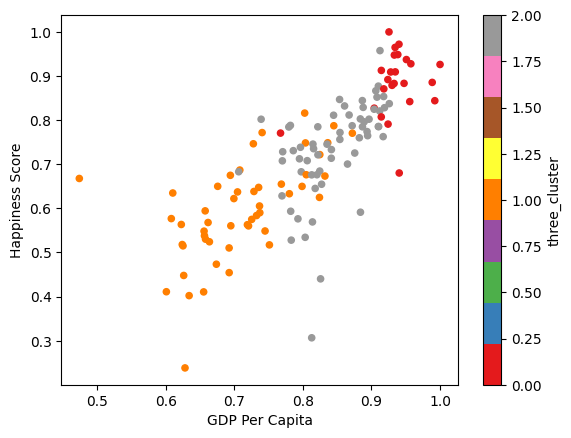

In [51]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Happiness Score',
    c="three_cluster",
    colormap='Set1'
)

**Q10: In the plot above, do we see clean clusters, or are points intermingled? What does this say about our clustering model in relation to the columns shown in the plot?**

There are points here and there that are intermingled. What this means is that the groups aren't perfectly correlated as a hgiehr correlation between the two groups would mean that there's more cleanliness in the cluster groups. 

Next, again, using the code from **above** as a template, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `Happiness Score` and `Generosity` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

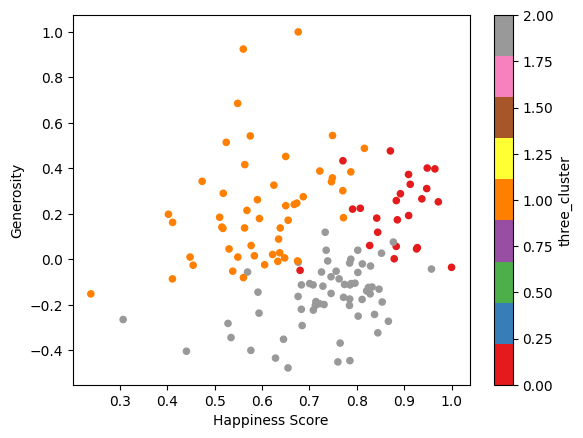

In [53]:
df2.plot.scatter(
    x='Happiness Score', 
    y='Generosity',
    c="three_cluster",
    colormap='Set1'
)

**Q11: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a low correlation between `Happiness Score` and `Generosity`. Does this make sense given the clusters above? Why or why not?**

There is slightly less intermingling. I think it wouldn't make sense as I would assume with a higher correlation, you'd have cleaner clusters but here, it's a low correlation but the clusters are pretty lcean. 

One last time, generate a **scatter plot** of `df2` such that:
- We observe the **relationship between** `GDP Per Capita` and `Healthy Life Expectancy` (these are your `x` and `y`)
- Visualize the **clusters by color** (keep `c` and `colormap` identical):

<Axes: xlabel='GDP Per Capita', ylabel='Healthy Life Expectancy'>

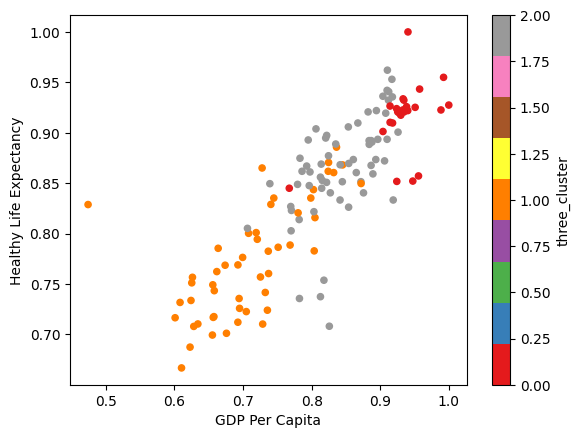

In [54]:
df2.plot.scatter(
    x='GDP Per Capita', 
    y='Healthy Life Expectancy',
    c="three_cluster",
    colormap='Set1'
)

**Q12: In the plot above, do we see clean clusters, or are points intermingled? In Part 1, you may have observed a high correlation between `GDP Per Capita` and `Healthy Life Expectancy`. Does this make sense given the clusters above? Why or why not?**

No because there is higher correlation but the clusters are pretty mingled.

### Group Analysis: Comparing Models
**Q13:** Now that we've **trained and visualized** both a **two-cluster** and **three-cluster** KMeans model on the World Happiness Dataset, make some observations about the **performance of both**. Do you think one of the two models we've created **better clusters** the dataset or **reflects patterns** within it? Backup your answer with **at least three observations** from your visualizations. 



With more clusters, it appeared that there is a significant drop in the percentage of intermingling. The clusters were a lot cleaner and more differentiable. In the two-cluster model, there was a lot of blend whereas in the three-cluster model, it was more differentiable. I believe that the three-cluster model better clusters the dataset and reflect patterns.

*Side Note:* If you are curious, there are **numeric metrics** in the `sklearn.metrics` module that can be used to evaluate clustering models **quantitatively**. Feel free to investigate any of those metrics on your own time (**not required** for this lab). One example of such a metric is **silhouette score** - which measures how similar an object is to its own cluster versus neighboring cluster(s).

<hr style="color: #DD3403;">

# Part 4: Reflecting on Machine Learning

**Q14**: Consider the takeaways from both this lab and the previous (`lab_regression`). You've learned a lot about two **fundamental machine learning** techniques - **regression** and **clustering**. Given your experience, answer the following questions in a paragraph-style response:
- When would you employ **regression** rather than **clustering** and vice-versa? What are the most important *"tells"* that a dataset can have to guide your intuition? 
- Do you believe that **clustering** was particularly effective for the **World Happiness Dataset**? What takeaways do you think **regression** have provided instead? 
- How would you approach conducting Machine Learning on our **Hello Dataset**? Do you believe it is better suited for **regression** or **clustering**? Both?  



I think that when you employ regression when you have concrete and exact numbers to work with. It would seem that regression is better suited for sorting categories and deriving meaning from them and their correlations. I think clustering was ok at giving some takeaways as it was able to cover a wider ground. However, I think that linear regression could've probably given a clearer and specific answer. For the Hello dataset, I think that both regression and clustering could work. 

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)